# OpenCV
OpenCV is a library of programming functions mainly aimed at real-time computer vision. Originally developed by Intel, it was later supported by Willow Garage then Itseez. The library is cross-platform and free for use under the open-source Apache 2 License.<br>

<img width="335px" src ="https://brands.home-assistant.io/_/opencv/logo.png">

Importing the library

In [30]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Read image

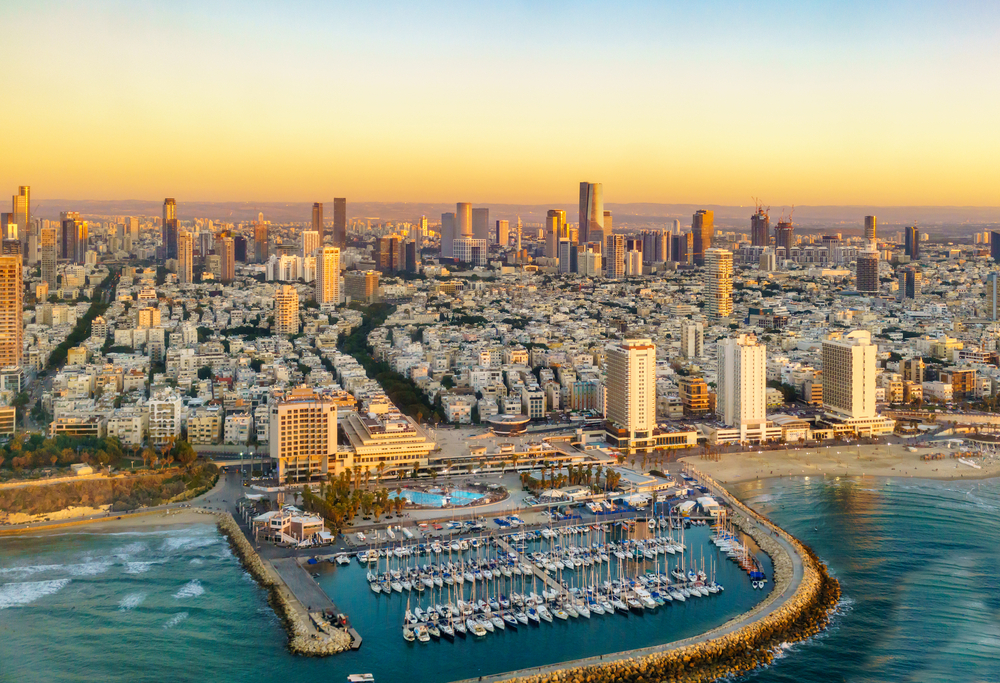

In [20]:
img = cv2.imread('image.jpg')
cv2_imshow(img)

Print image pixels

In [21]:
print(img)

[[[199 218 203]
  [199 216 202]
  [197 217 198]
  ...
  [224 206 189]
  [224 206 189]
  [221 205 188]]

 [[200 217 206]
  [199 217 204]
  [200 217 204]
  ...
  [226 205 190]
  [226 205 190]
  [226 207 192]]

 [[199 217 204]
  [200 217 203]
  [200 218 205]
  ...
  [227 205 193]
  [226 204 192]
  [224 208 192]]

 ...

 [[101 102  60]
  [105 108  76]
  [103 113  83]
  ...
  [116  94  42]
  [118  97  45]
  [119 109  49]]

 [[106 112  71]
  [106 107  73]
  [ 95 104  64]
  ...
  [116  99  48]
  [116 104  50]
  [114 103  41]]

 [[ 95  97  55]
  [ 92  93  53]
  [ 94  99  54]
  ...
  [119 121  79]
  [124 127  81]
  [121 121  75]]]


Crop Image

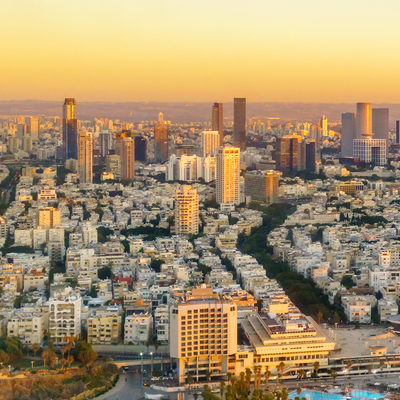

In [22]:
croped_image = img[100:500, 100:500, :]
cv2_imshow(croped_image)

Read image as Gray scale

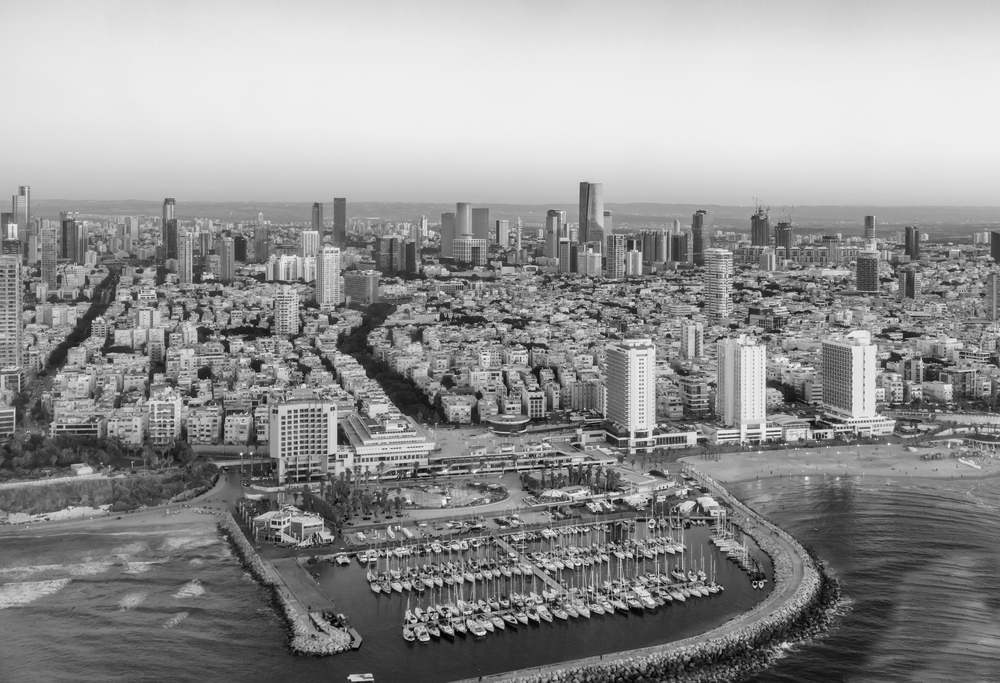

In [101]:
img_gray = cv2.imread('image.jpg', 0)
cv2_imshow(img_gray)

Split image to RGB

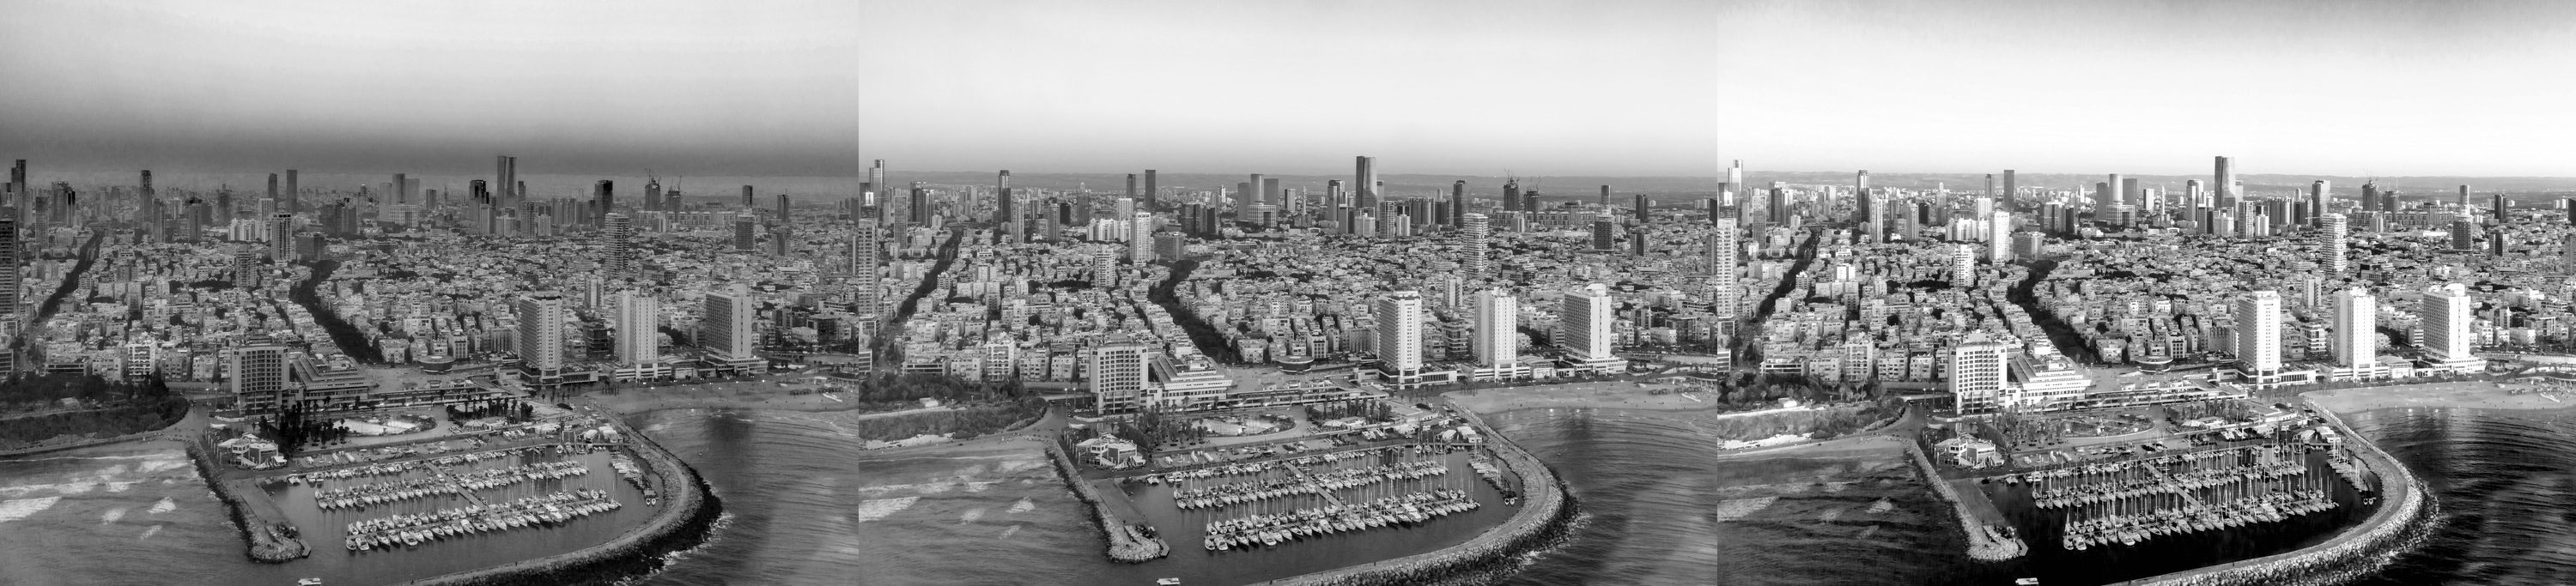

In [44]:
b, g, r = cv2.split(img)

numpy_horizontal_concat = np.concatenate((b, g, r), axis=1)
cv2_imshow(numpy_horizontal_concat)


Split image to YUV. Y is the Luminnance of the image and U,V is the chrominance of the image (Color). U is the blue color and V is the red color.

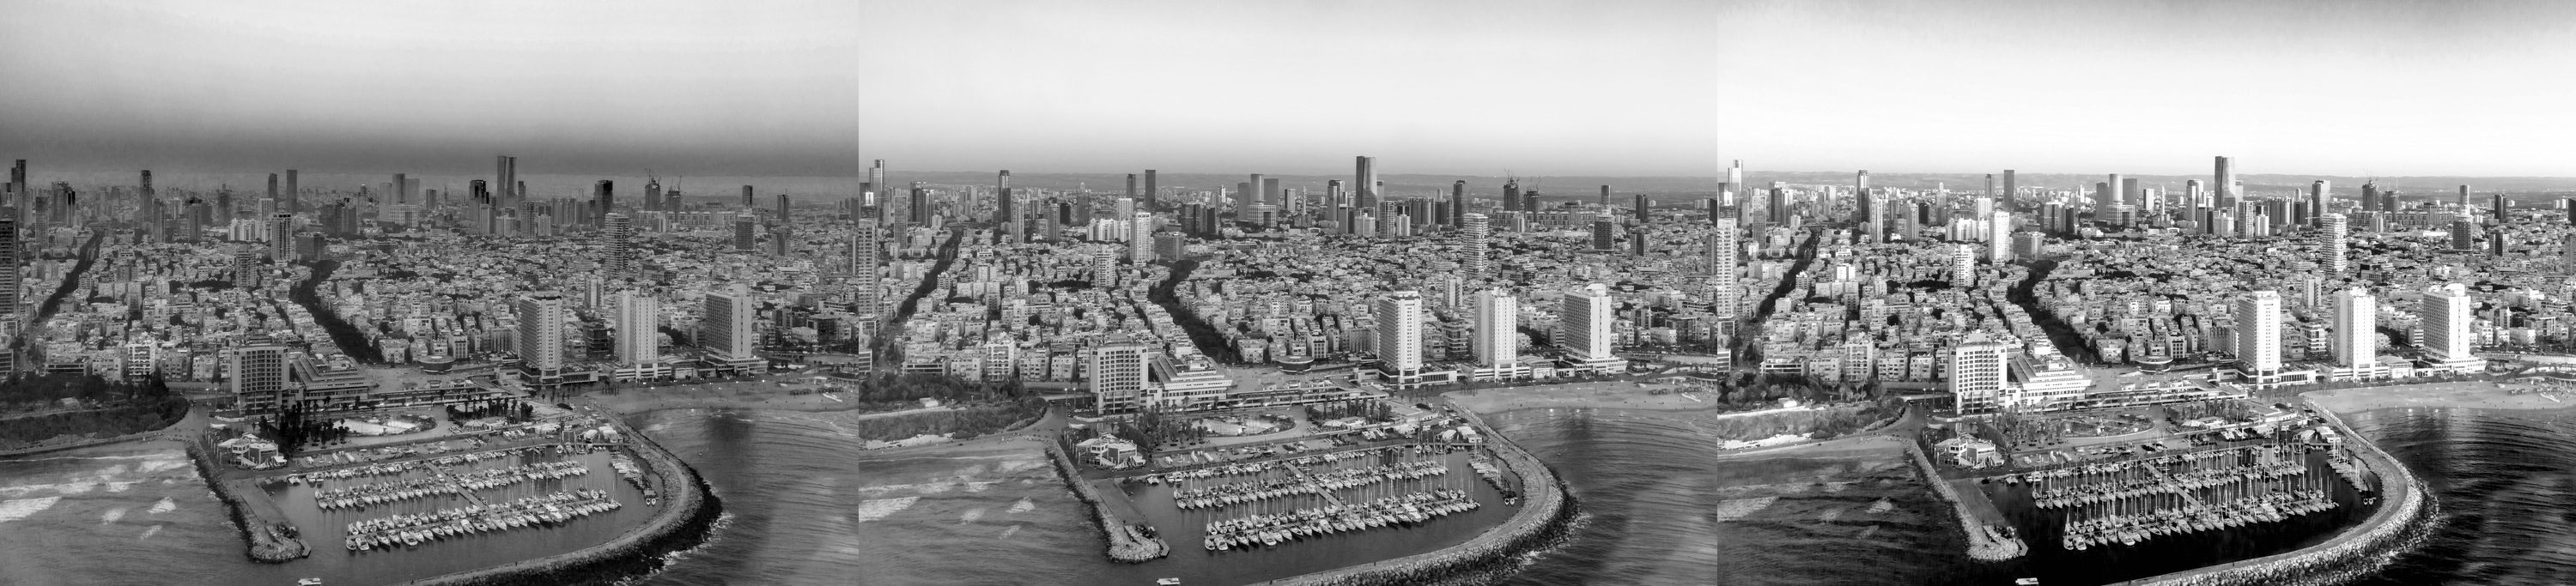

In [61]:
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
y, u, v = cv2.split(img)

numpy_horizontal_concat = np.concatenate((y, u, v), axis=1)
cv2_imshow(numpy_horizontal_concat)


Lighten the image

In [90]:
brighter_y = cv2.add(y, 80)
brighter_u = cv2.add(u, 80)
brighter_v = cv2.add(v, 80)

brighter_yuv = cv2.merge((brighter_y, brighter_u, brighter_v))

numpy_horizontal_concat = np.concatenate((img, brighter_yuv), axis=1)
cv2_imshow(numpy_horizontal_concat)

Output hidden; open in https://colab.research.google.com to view.

Darken the image

In [91]:
darker_y = cv2.add(y, -80)
darker_u = cv2.add(u, -80)
darker_v = cv2.add(v, -80)

darker_yuv = cv2.merge((darker_y, darker_u, darker_v))

numpy_horizontal_concat = np.concatenate((img, darker_yuv), axis=1)
cv2_imshow(numpy_horizontal_concat)


Output hidden; open in https://colab.research.google.com to view.

### Rotating the image
<ul>
  <li>center – The center coordinates of the image</li>
  <li>Angle – The angle (in degrees) by which the image should be rotated</li>
  <li>Scale – The scaling factor
 </li>
</ul>
<img width="400px" src="https://media.geeksforgeeks.org/wp-content/uploads/20190904230758/Screenshot-2019-08-24-at-5.38.11-PM.png">


In [96]:
img_shape = img.shape
print(img_shape)

(683, 1000, 3)


In [99]:
h, w = img.shape[:2]
print(f'height: {h}, width: {w}')

height: 683, width: 1000


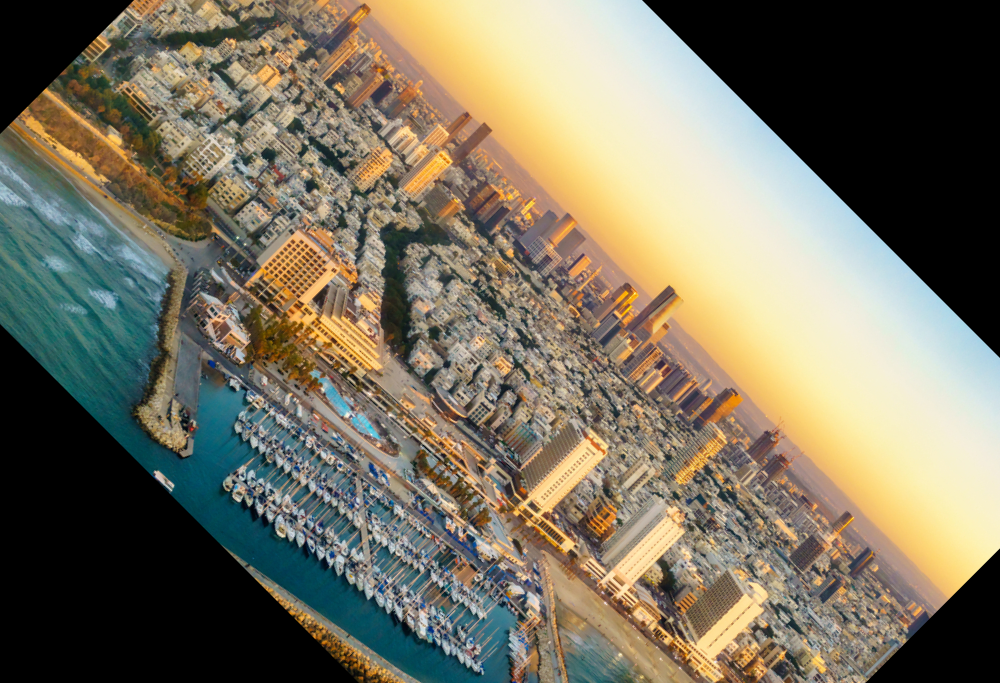

In [100]:
# Calculating the center of the image
center = (w // 2, h // 2)
  
# Generating a rotation matrix
matrix = cv2.getRotationMatrix2D(center, -45, 1.0) 
  
# Performing the affine transformation
rotated = cv2.warpAffine(img, matrix, (w, h))
cv2_imshow(rotated)

### Blur the image by Gaussian blur
<ul>
  <li>Choose kernel size </li>
  <li>Choose Kernel standard deviation along X-axis (Choose 0 for now...)
 </li>
  <li>Average every [ixel in the kernel (each color channel</li>
  
</ul>



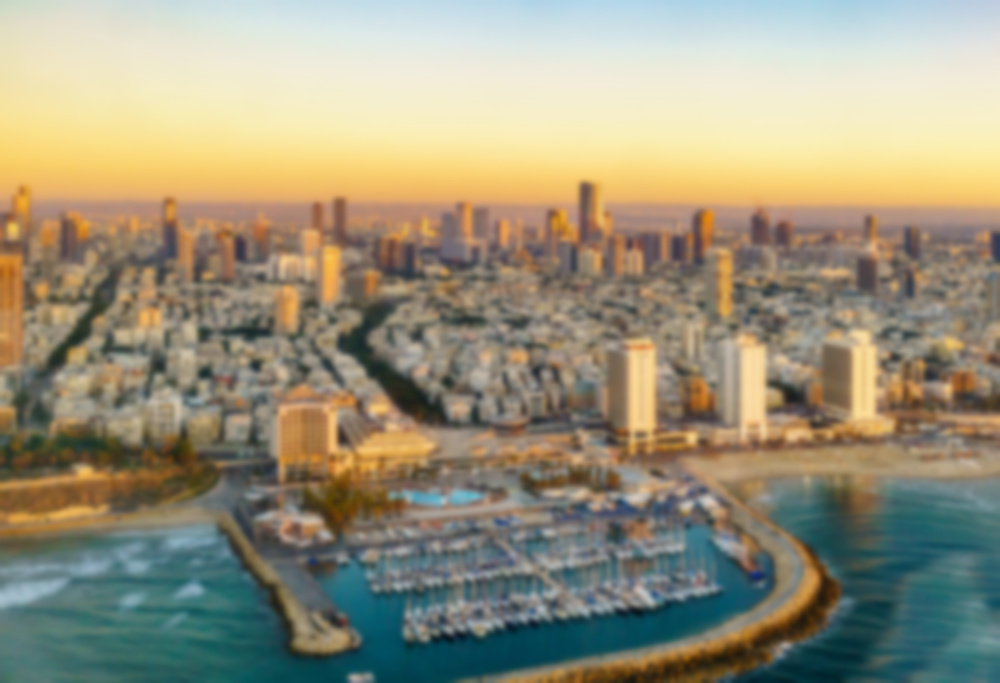

In [104]:
Gaussian = cv2.GaussianBlur(img, (15, 15), 0)
cv2_imshow(Gaussian)

Detect corner of an image using OpenCV

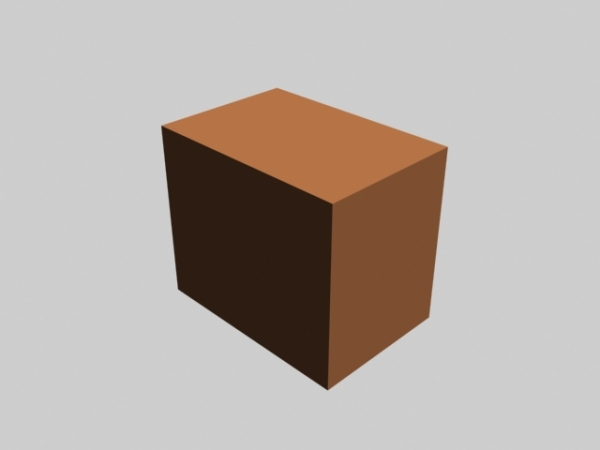

In [111]:
box = cv2.imread('box.jpg')
cv2_imshow(box)

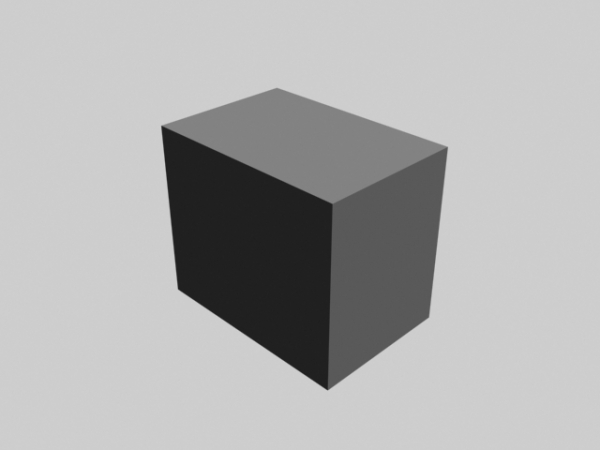

In [112]:
# convert image to gray scale imag
gray_box= cv2.cvtColor(box, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_box)

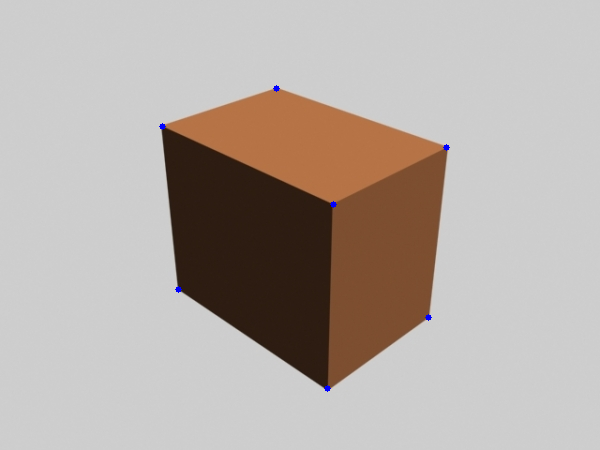

In [113]:
# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray_box, 27, 0.01, 10)
corners = np.int0(corners)
  
# we iterate through each corner, 
# making a circle at each point that we think is a corner.
for i in corners:
    x, y = i.ravel()
    cv2.circle(box, (x, y), 3, 255, -1)

cv2_imshow(box)

Face Detection with OpenCV

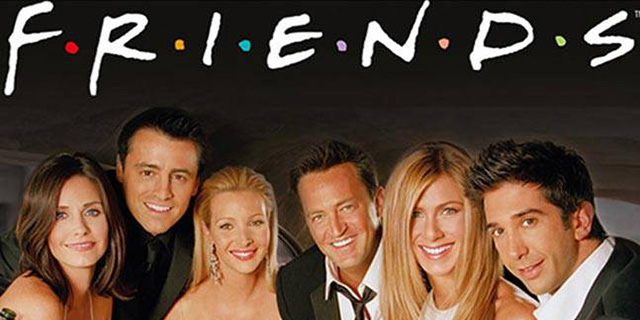

In [130]:
faces_img = cv2.imread('faces.jpg')
cv2_imshow(faces_img)

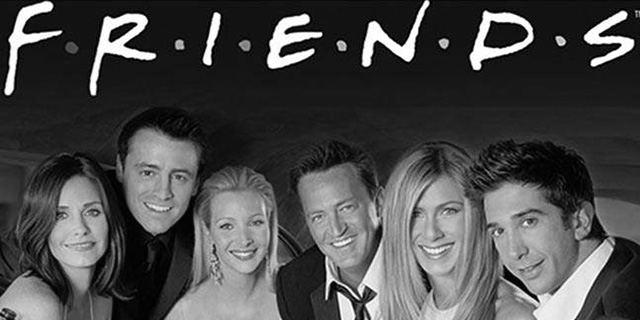

In [131]:
# Convert into grayscale
gray_faces = cv2.cvtColor(faces_img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_faces)

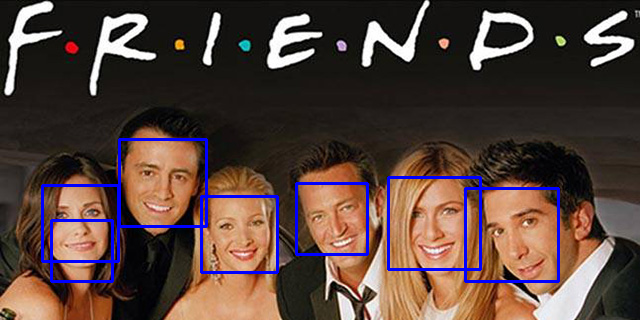

In [133]:
# Load the cascade ((trained model))
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Detect faces
faces = face_cascade.detectMultiScale(gray_faces, 1.1, 4)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(faces_img, (x, y), (x+w, y+h), (255, 0, 0), 2)

cv2_imshow(faces_img)